In [1]:
import scipy
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import scipy.io as sio
from scipy.spatial import distance

In [4]:
import scipy.io as sio
labels = sio.loadmat('../../imagelabels.mat')

In [5]:
l = labels['labels']

In [7]:
l[0]

array([77, 77, 77, ..., 62, 62, 62], dtype=uint8)

In [8]:
arr = [77]
brkpt = []
j = 0
for i in range(0, 8189):
    if(l[0][i] != arr[j]):
        arr.append(l[0][i])
        j = j+ 1
        brkpt.append(i)

In [9]:
brkpt

[251,
 445,
 597,
 780,
 946,
 1142,
 1313,
 1490,
 1583,
 1695,
 1826,
 1963,
 2068,
 2188,
 2315,
 2445,
 2552,
 2638,
 2752,
 2861,
 2919,
 3028,
 3094,
 3181,
 3283,
 3368,
 3459,
 3544,
 3640,
 3733,
 3827,
 3912,
 3993,
 4080,
 4158,
 4243,
 4325,
 4400,
 4480,
 4557,
 4624,
 4695,
 4766,
 4828,
 4896,
 4952,
 5019,
 5086,
 5146,
 5211,
 5277,
 5339,
 5398,
 5459,
 5522,
 5583,
 5628,
 5684,
 5743,
 5792,
 5848,
 5902,
 5956,
 6010,
 6048,
 6096,
 6148,
 6197,
 6246,
 6296,
 6345,
 6394,
 6440,
 6486,
 6527,
 6570,
 6611,
 6651,
 6692,
 6733,
 6773,
 6813,
 6849,
 6889,
 6928,
 6968,
 7006,
 7045,
 7085,
 7122,
 7161,
 7199,
 7233,
 7267,
 7283,
 7284,
 7298,
 7300,
 7301,
 7303,
 7465,
 7593,
 7684,
 7750,
 7832,
 7892,
 7941,
 7999,
 8047,
 8053,
 8061,
 8064,
 8077,
 8079,
 8081,
 8083,
 8088,
 8089,
 8097,
 8098,
 8104,
 8111,
 8117,
 8150]

In [11]:
c = pd.read_csv('../../image_numbers', header=None)
c[0] = c[0].map(lambda x: x.lstrip('image_').rstrip('.jpg'))
c[0] = pd.to_numeric(c[0])

In [12]:
a = c.values
a = a.reshape(8189)
a

array([1056,  980, 2099, ..., 1065, 6217, 1850])

In [13]:
tuple_index = []
for i in range (0, 8189):
    tuple_index.append((i, a[i]))

In [15]:
import operator
tp = sorted(tuple_index, key=operator.itemgetter(1))

In [16]:
arr = []
for i in range(780, 1583):
    arr.append(tp[i][0])

In [19]:
df = pd.read_csv('../../dataframe_pca.csv', index_col=0)
X = df.iloc[arr, :]
X

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
4508,-23.251263,-13.948059,6.528440,-23.520345,-11.984198,-10.479540,-24.277653,-4.311621,7.580147,-9.542934,...,1.923453,1.720033,0.006921,-0.152213,0.095628,0.146848,-1.297547,0.057518,-2.445087,0.387170
7789,91.860406,-50.305161,17.421401,4.202665,-34.467213,25.726895,-6.889017,6.524394,19.887387,4.290483,...,0.075962,0.968115,0.502068,-1.346602,-1.492075,-0.994425,-0.572245,1.336267,-1.487953,0.691430
4338,-24.359727,-9.122176,34.924202,11.398040,-11.646704,2.301208,-20.322981,17.376862,15.842649,9.411233,...,0.790361,-0.616806,-1.715247,0.479487,0.743634,0.144409,0.749094,-1.029192,0.746950,-1.424668
8048,-53.476511,-11.408123,67.308600,14.412107,-34.635819,2.321671,6.525194,-8.580818,-24.707337,20.055851,...,0.955502,1.030961,-1.724193,0.658687,-0.122473,-0.611055,-0.390346,0.428956,-1.624289,0.516155
7618,-20.427549,1.170666,5.938119,9.368008,-1.539353,17.053289,-11.121585,13.249726,39.947607,18.041432,...,-1.069735,-0.372268,0.973114,-1.175072,0.077693,-0.818183,1.713596,-1.620748,-0.118887,0.066049
3300,-14.027147,21.504656,38.589123,49.616583,-25.803166,8.552387,0.274420,-2.717973,3.835165,22.871841,...,-1.052914,0.702574,0.516012,-2.685304,0.871559,1.174054,-0.011892,-1.767164,-2.020459,-0.272726
2725,-16.331189,-21.880632,0.629011,7.163919,7.503538,4.639182,-12.622547,-4.998900,20.425595,-11.187062,...,0.998329,0.547538,0.445638,-1.097429,0.084282,-0.315992,-1.220134,0.588726,-0.370765,-1.174878
4052,-47.027149,-24.242879,0.146602,5.976727,26.014697,5.150590,-16.024317,6.108466,13.852244,2.431311,...,-0.663380,-0.765786,-0.839560,-0.928018,-1.106179,0.078793,-1.726967,0.321483,0.481333,0.168274
2624,-37.237604,-14.159758,14.846471,0.881648,-13.565769,16.907514,-5.607290,-10.603780,3.573776,-6.548839,...,-0.269077,-1.228046,-1.559048,-1.323103,-1.407678,1.042844,-0.247736,1.085385,-0.611643,-1.150832
7676,-2.541726,-21.164233,24.683577,-2.428656,-19.730311,-18.365868,-1.218164,20.418589,8.807669,14.326858,...,-0.450500,0.511523,-0.428425,-1.745375,-0.766552,-0.447349,-0.738578,-0.614907,-0.589117,0.059954


In [20]:
X = X.reset_index()

In [22]:
X.drop('index' ,axis=1,inplace=True)
X.to_csv('first_(5to9)_cat.csv')

In [24]:
label5to9 = []
for i in range(780, 1583):
    label5to9.append(l[0][i])

In [26]:
np.savetxt('label5to9.txt', label5to9)

In [27]:
df5to9 = pd.read_csv('first_(5to9)_cat.csv', index_col=0)
df5to9

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-23.251263,-13.948059,6.528440,-23.520345,-11.984198,-10.479540,-24.277653,-4.311621,7.580147,-9.542934,...,1.923453,1.720033,0.006921,-0.152213,0.095628,0.146848,-1.297547,0.057518,-2.445087,0.387170
1,91.860406,-50.305161,17.421401,4.202665,-34.467213,25.726895,-6.889017,6.524394,19.887387,4.290483,...,0.075962,0.968115,0.502068,-1.346602,-1.492075,-0.994425,-0.572245,1.336267,-1.487953,0.691430
2,-24.359727,-9.122176,34.924202,11.398040,-11.646704,2.301208,-20.322981,17.376862,15.842649,9.411233,...,0.790361,-0.616806,-1.715247,0.479487,0.743634,0.144409,0.749094,-1.029192,0.746950,-1.424668
3,-53.476511,-11.408123,67.308600,14.412107,-34.635819,2.321671,6.525194,-8.580818,-24.707337,20.055851,...,0.955502,1.030961,-1.724193,0.658687,-0.122473,-0.611055,-0.390346,0.428956,-1.624289,0.516155
4,-20.427549,1.170666,5.938119,9.368008,-1.539353,17.053289,-11.121585,13.249726,39.947607,18.041432,...,-1.069735,-0.372268,0.973114,-1.175072,0.077693,-0.818183,1.713596,-1.620748,-0.118887,0.066049
5,-14.027147,21.504656,38.589123,49.616583,-25.803166,8.552387,0.274420,-2.717973,3.835165,22.871841,...,-1.052914,0.702574,0.516012,-2.685304,0.871559,1.174054,-0.011892,-1.767164,-2.020459,-0.272726
6,-16.331189,-21.880632,0.629011,7.163919,7.503538,4.639182,-12.622547,-4.998900,20.425595,-11.187062,...,0.998329,0.547538,0.445638,-1.097429,0.084282,-0.315992,-1.220134,0.588726,-0.370765,-1.174878
7,-47.027149,-24.242879,0.146602,5.976727,26.014697,5.150590,-16.024317,6.108466,13.852244,2.431311,...,-0.663380,-0.765786,-0.839560,-0.928018,-1.106179,0.078793,-1.726967,0.321483,0.481333,0.168274
8,-37.237604,-14.159758,14.846471,0.881648,-13.565769,16.907514,-5.607290,-10.603780,3.573776,-6.548839,...,-0.269077,-1.228046,-1.559048,-1.323103,-1.407678,1.042844,-0.247736,1.085385,-0.611643,-1.150832
9,-2.541726,-21.164233,24.683577,-2.428656,-19.730311,-18.365868,-1.218164,20.418589,8.807669,14.326858,...,-0.450500,0.511523,-0.428425,-1.745375,-0.766552,-0.447349,-0.738578,-0.614907,-0.589117,0.059954


In [28]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vis_data = model.fit_transform(df5to9.values)

In [29]:
from matplotlib import pyplot as plt
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

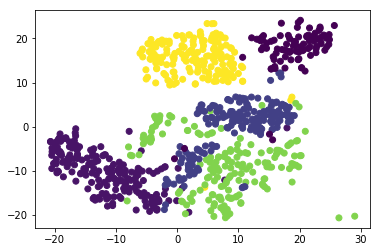

In [31]:
import itertools
plt.scatter(vis_x, vis_y, c=label5to9)

plt.show()

In [34]:
length = df5to9.shape[0]
T = df5to9.values
a = np.zeros((length, length), dtype=np.float)

for i in range(0,length):
    for j in range(0,length):
        a[i][j] = distance.euclidean(T[i],T[j])

In [35]:
distances = pd.DataFrame(data = a)
distances.head()

,0,1,2,3,4,5,6,7,8,9,...,793,794,795,796,797,798,799,800,801,802
0,0.000000,156.952483,96.585630,134.396242,105.894274,146.279549,86.431715,104.253341,78.054823,92.924916,...,117.266283,110.544239,131.786420,100.944748,127.623957,110.006360,117.921470,106.398336,137.461014,150.655307
1,156.952483,0.000000,153.217877,192.339267,154.984864,176.765474,152.558318,177.581986,154.897562,131.119562,...,201.044959,206.083006,198.329520,207.611235,213.486929,203.796480,178.464582,206.209874,210.700080,178.591821
2,96.585630,153.217877,0.000000,122.141743,102.868156,120.415728,99.867431,106.768847,82.061646,90.336540,...,139.285960,124.442234,148.215758,118.802761,138.208643,122.219069,131.894033,117.666288,140.469964,162.147044
3,134.396242,192.339267,122.141743,0.000000,141.496180,130.574113,145.238807,140.651780,114.165624,125.112375,...,163.207133,141.969332,179.970999,135.340801,146.408426,145.237202,168.593842,139.117789,167.498253,195.299590
4,105.894274,154.984864,102.868156,141.496180,0.000000,125.774778,100.770267,99.303226,93.742893,109.470274,...,141.048760,132.516002,149.624115,124.424577,146.119963,126.174066,127.529547,127.137940,152.288232,160.222651


In [36]:
distances.to_csv('distances(5to9)cat.csv')

In [37]:
utm = np.triu(a, k=1)
X = csr_matrix(utm)
Tcsr = minimum_spanning_tree(X)

In [38]:
print Tcsr

  (0, 76)	76.2939727722
  (1, 12)	79.6897655804
  (2, 58)	95.4122406948
  (2, 148)	76.1094652831
  (3, 129)	91.5655917442
  (4, 22)	74.6881350705
  (5, 44)	96.2811150912
  (6, 81)	72.8259817014
  (7, 105)	84.0563535213
  (7, 153)	80.3255124438
  (8, 70)	56.3533553113
  (8, 124)	74.623233344
  (8, 132)	78.6151861344
  (9, 74)	69.9874008002
  (9, 114)	78.8623677391
  (10, 36)	103.816705542
  (10, 50)	72.7668843992
  (11, 14)	76.5839527499
  (11, 21)	81.3410146378
  (11, 70)	68.1379173556
  (11, 76)	64.6044718408
  (11, 95)	56.3963804477
  (11, 98)	95.1236717188
  (11, 126)	78.1769081451
  (11, 127)	68.7972274084
  :	:
  (753, 802)	94.8045786256
  (754, 761)	102.514141381
  (759, 787)	70.3085411683
  (761, 783)	86.7316559017
  (761, 801)	80.8433071453
  (762, 792)	78.9293817596
  (763, 782)	92.4628956423
  (764, 787)	86.4600390492
  (765, 787)	87.0228693513
  (766, 772)	68.0808130537
  (767, 777)	117.908966088
  (771, 784)	81.3552143651
  (772, 799)	68.5567486008
  (773, 787)	87.271553214

In [39]:
df_mst = pd.DataFrame(data=Tcsr.toarray())
df_mst.to_csv('mst_ut_(5to9)cat.csv')

# Graph Visualization

In [40]:
from graph_tool.all import *

In [42]:
df_mst = pd.read_csv('mst_ut_(5to9)cat.csv', index_col=0)

In [43]:
a = df_mst.values
dict = {}

for i in range(0, length):
    for j in range(i, length):
        if a[i][j] != 0:
            dict[(i,j)] = a[i][j]

In [44]:
import operator
asec_dict = sorted(dict.items(), key=operator.itemgetter(1))
des_dict = sorted(dict.items(), key=operator.itemgetter(1))

In [45]:
des_dict.reverse()

In [47]:
g = Graph(directed=False)
arr = [None]*length
for i in range(0, length):
    arr[i] = g.add_vertex()

In [48]:
for i in des_dict:
    e = g.add_edge(arr[i[0][0]], arr[i[0][1]])

In [49]:
label5to9

[81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 81,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,
 46,


In [55]:
import graph_tool as gt
bv, be = betweenness(g)
for idx,i in enumerate(label5to9):
    if i == 81:
        bv[idx] = 0.2
    elif i == 46:
        bv[idx] = 0.4
    elif i == 74:
        bv[idx] = 0.6
    elif i == 51:
        bv[idx] = 0.75
    else:
        bv[idx] = 0.9
        
for idx, i in enumerate(des_dict):
    be[g.get_edges()[idx]] = i[1]/50
# be.a /= be.a.max() / 5
gt.draw.graphviz_draw(g, vcolor=bv, vorder=bv, elen=be,output="graphviz-draw(5to9).pdf", vsize=0.5)
# graph_draw(g,pos=pos, vertex_text=g.vertex_index, vertex_font_size=8,
#            output_size=(1000, 1000), output="two-nodes.png",vertex_fill_color=bv, edge_pen_width=be)

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f0d5ed14090, at 0x7f0d3cf00f10>

# SVM Accuracy 

In [56]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [57]:
X = df5to9
y = label5to9

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=7)

In [69]:
from sklearn.svm import SVC
clf = SVC(gamma=0.00005)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [70]:
clf.score(X_test, y_test)

0.98136645962732916

# Adjacency

In [71]:
adj = []
for i in range(0, len(asec_dict)+1):
    a = []
    adj.append(a)

In [72]:
for i in asec_dict:
    adj[i[0][0]].append(i[0][1])
    adj[i[0][1]].append(i[0][0])
adj

[[76],
 [12],
 [148, 58],
 [129],
 [22],
 [44],
 [81],
 [153, 105],
 [70, 124, 132],
 [74, 114],
 [50, 36],
 [136, 95, 76, 70, 127, 162, 14, 126, 21, 98],
 [95, 20, 1, 130],
 [17, 112],
 [11, 47],
 [82, 29],
 [74, 101, 94],
 [13, 96],
 [76, 22],
 [120],
 [12, 117],
 [97, 11],
 [4, 18],
 [106],
 [114],
 [95],
 [95, 125],
 [66, 53],
 [146, 87],
 [100, 15],
 [44],
 [148, 129, 60, 89],
 [161],
 [103],
 [42, 57],
 [69],
 [10],
 [159],
 [120],
 [154, 145, 66],
 [139],
 [160, 135],
 [81, 59, 34],
 [50],
 [5, 122, 30],
 [68, 151],
 [129],
 [14],
 [100],
 [79],
 [43, 157, 10, 63],
 [67],
 [146],
 [27],
 [82],
 [157, 69, 90],
 [64],
 [34],
 [2],
 [42],
 [31],
 [145, 130],
 [127],
 [50],
 [603, 459, 56],
 [124],
 [27, 39],
 [132, 51],
 [45, 161, 97, 164],
 [35, 55],
 [8, 11, 73],
 [75, 121, 129],
 [134],
 [70],
 [16, 136, 85, 148, 140, 9, 96, 133],
 [71],
 [11, 18, 0, 84],
 [127],
 [81],
 [49, 106],
 [151],
 [136, 42, 78, 102, 6],
 [15, 130, 88, 54],
 [375, 415],
 [76],
 [74, 122],
 [127],
 [28],

In [77]:
arr = []
brr = []
for k  in range(0, len(des_dict)):

    a,b = des_dict[k][0][0],des_dict[k][0][1]

    arr1 = [a]

    for j in arr1:
    #     print "a"
        for i in adj[j]:
            #print "c"
            if i != b:
                if i not in arr1: 
                    arr1.append(i)

    arr2 = [b]

    for j in arr2:
    #     print "a"
        for i in adj[j]:
            #print "c"
            if i != a:
                if i not in arr2: 
                    arr2.append(i)
                        
                        
    arr.append((len(arr1), len(arr2)))

In [78]:
arr

[(802, 1),
 (1, 802),
 (1, 802),
 (802, 1),
 (802, 1),
 (800, 3),
 (1, 802),
 (1, 802),
 (1, 802),
 (1, 802),
 (1, 802),
 (802, 1),
 (1, 802),
 (1, 802),
 (802, 1),
 (1, 802),
 (800, 3),
 (1, 802),
 (2, 801),
 (802, 1),
 (802, 1),
 (3, 800),
 (802, 1),
 (1, 802),
 (1, 802),
 (802, 1),
 (802, 1),
 (802, 1),
 (802, 1),
 (1, 802),
 (802, 1),
 (1, 802),
 (1, 802),
 (2, 801),
 (802, 1),
 (802, 1),
 (802, 1),
 (801, 2),
 (802, 1),
 (802, 1),
 (4, 799),
 (802, 1),
 (802, 1),
 (802, 1),
 (802, 1),
 (802, 1),
 (1, 802),
 (801, 2),
 (1, 802),
 (1, 802),
 (1, 802),
 (2, 801),
 (801, 2),
 (1, 802),
 (2, 801),
 (802, 1),
 (802, 1),
 (1, 802),
 (802, 1),
 (1, 802),
 (1, 802),
 (1, 802),
 (802, 1),
 (802, 1),
 (802, 1),
 (1, 802),
 (802, 1),
 (802, 1),
 (1, 802),
 (802, 1),
 (1, 802),
 (801, 2),
 (3, 800),
 (802, 1),
 (802, 1),
 (1, 802),
 (2, 801),
 (802, 1),
 (1, 802),
 (2, 801),
 (802, 1),
 (801, 2),
 (802, 1),
 (1, 802),
 (3, 800),
 (1, 802),
 (1, 802),
 (800, 3),
 (1, 802),
 (2, 801),
 (1, 802),

In [79]:
len(arr)

802